# Example of usage with [Iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork

Iris datasets has 4 inputs and 3 classes corresponding 3 Iris species.

In [2]:
number_of_inputs = 4
number_of_outputs = 3

In [3]:
with open("iris.data") as fin:
    lines = fin.readlines()
    X, y, types = [], [], []
    encode_types = {}
    for line in lines:
        X.append([float(x) for x in line.strip().split(",")[:number_of_inputs]])
        types.append(line.strip().split(",")[-1])
    for (ind, t) in enumerate(set(types)):
        encode_types[t] = ind
    if (len(encode_types) < 3):
        for k in range(len(types)):
            y.append([encode_types[types[k]]])
    else:
        for k in range(len(types)):
            y.append([0]*len(encode_types))
            y[k][encode_types[types[k]]] = 1
X = np.array(X)
y = np.array(y)

In [4]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
y[:10]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

First 10 examples. 1 in 3rd position in y corresponds to 3rd class, same with 1st and 2nd.

In [6]:
n = NeuralNetwork.Network((number_of_inputs,5,number_of_outputs))

Initialize neural network with 4 neurons in input layer, 5 in hidden layer and 3 in output layer. Also, there one hidden neuron in input and hidden layers. All weights are initialized randomly.

In [7]:
train_index = np.random.choice(np.arange(len(y)), int(len(y)/3), replace = False)
test_index = np.array([], dtype = int)
for i in range(len(y)):
    if i not in train_index:
        test_index = np.append(test_index, i)
X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

Randomly select 50 examples for training dataset and 100 for testing.

In [8]:
alpha = 0.05
lmb = 0

These are learning parameters. alpha is learning rate and lmb is regularization constant. In this example regularization isn't used.

In [9]:
J = n.GradDesc(X_train, y_train, alpha = alpha, lmb = lmb, eps = 1e-4, MaxIter = 5000)

J = 0.32404580470647554
iteration 2726 	 J = 0.32394507431340286
iteration 2727 	 J = 0.32384444903212
iteration 2728 	 J = 0.3237439287152512
iteration 2729 	 J = 0.32364351321566054
iteration 2730 	 J = 0.3235432023864504
iteration 2731 	 J = 0.323442996080962
iteration 2732 	 J = 0.32334289415277445
iteration 2733 	 J = 0.3232428964557038
iteration 2734 	 J = 0.32314300284380454
--- GradDesc finished ---


Perform gradient descent to fit parameters. eps = 1e-4 means that algorithm stops when absolute difference in cost function values between two iterations is less than 0.0001.

In [10]:
accuracy_train = 0
for k in range(len(y_train)):
    accuracy_train += np.argmax(n.h(X_train[k])) == np.argmax(y_train[k])
print(f"\naccuracy on train = {accuracy_train/len(y_train)} ({accuracy_train}/{len(y_train)})")

accuracy_test = 0
for k in range(len(y_test)):
    #print(n.h(X_test[k]), np.argmax(n.h(X_test[k])) == np.argmax(y_test[k]))
    accuracy_test += np.argmax(n.h(X_test[k])) == np.argmax(y_test[k])
print(f"accuracy on test = {accuracy_test/len(y_test)} ({accuracy_test}/{len(y_test)})")


accuracy on train = 0.96 (48/50)
accuracy on test = 0.98 (98/100)


Check accuracy on training and testing datasets.

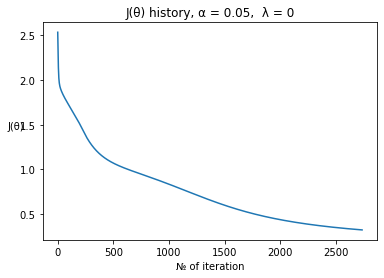

In [11]:
plt.plot(J)
plt.title(f'J(θ) history, α = {alpha},  λ = {lmb}')
plt.xlabel('№ of iteration')
plt.ylabel('J(θ)', rotation = 0)
plt.show()

Plot cost function J values depending on number of iteration.

In [12]:
demo_index = np.random.choice(np.arange(len(y)), 10, replace = False)
np.set_printoptions(suppress=True)
print("neural network output \t\t\t correct output \t equals?")
for i in demo_index:
    print(f"{n.h(X[i])} \t {y[i]} \t\t {np.argmax(n.h(X[i])) == np.argmax(y[i])}")


neural network output 			 correct output 	 equals?
[0.76896935 0.12095    0.02873922] 	 [1 0 0] 		 True
[0.13443585 0.91109647 0.00629543] 	 [0 1 0] 		 True
[0.0513764  0.00170656 0.97206277] 	 [0 0 1] 		 True
[0.04507235 0.00161022 0.97519105] 	 [0 0 1] 		 True
[0.89591091 0.03512593 0.04449643] 	 [1 0 0] 		 True
[0.82674451 0.07895918 0.03314919] 	 [1 0 0] 		 True
[0.04071609 0.00154664 0.97797946] 	 [0 0 1] 		 True
[0.04611716 0.00162746 0.97481246] 	 [0 0 1] 		 True
[0.09469205 0.94556993 0.00544371] 	 [0 1 0] 		 True
[0.16926616 0.87672193 0.00701485] 	 [0 1 0] 		 True


Compare some neural network outputs with correct ones.